In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rqdatac
from rqalpha.apis import *
from rqoptimizer import *
from rqoptimizer.utils import *
from rqdatac import *
from rqalpha_plus import run_func
import warnings
from functools import wraps
warnings.filterwarnings("ignore")
rqdatac.init()

Cannot initialize filter sz3: File not found


In [5]:
df_etf = pd.read_excel('etf_code.xlsx')
etf_code = df_etf.code.values.tolist()
etf_code = [str(code) for code in etf_code]
df_etf = all_instruments(type='ETF' , market = 'cn')
df_etf = df_etf[df_etf.trading_code.isin(etf_code)]

In [6]:
symbol = df_etf.order_book_id.values.tolist()
start = "2024-04-01"
end = "2024-05-21"
frequency = "1m"

In [7]:
get_yield_curve(start_date='2013-01-04', end_date='2014-01-04', tenor=None, market='cn')

,0S,1M,2M,3M,6M,9M,1Y,2Y,3Y,4Y,...,6Y,7Y,8Y,9Y,10Y,15Y,20Y,30Y,40Y,50Y
trading_date,,,,,,,,,,,,,,,,,,,,,
2013-01-04,0.019617,0.025344,0.028781,0.027876,0.027967,0.028303,0.029189,0.030955,0.031360,0.031822,...,0.034246,0.035029,0.035287,0.035659,0.036062,0.038695,0.041012,0.042035,0.042903,0.043549
2013-01-05,0.017086,0.024270,0.028581,0.027486,0.027717,0.028059,0.028768,0.030480,0.030942,0.031579,...,0.034152,0.034961,0.035195,0.035581,0.036003,0.038661,0.040995,0.042026,0.042895,0.043541
2013-01-06,0.016036,0.023814,0.028481,0.027178,0.027273,0.027962,0.028688,0.030391,0.030983,0.031537,...,0.034047,0.035002,0.035195,0.035555,0.035950,0.038639,0.040984,0.042021,0.042889,0.043535
2013-01-07,0.015575,0.023641,0.028481,0.027277,0.027136,0.027912,0.028689,0.030415,0.030912,0.031625,...,0.034133,0.034950,0.035194,0.035565,0.035965,0.038647,0.040988,0.042023,0.042892,0.043538
2013-01-08,0.015496,0.023408,0.028181,0.026878,0.026829,0.027711,0.028498,0.030208,0.030646,0.031399,...,0.034092,0.034743,0.035144,0.035545,0.035943,0.038647,0.040988,0.042023,0.042892,0.043538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-27,0.022347,0.049547,0.047501,0.046621,0.042421,0.040555,0.041496,0.043645,0.043718,0.044869,...,0.046558,0.045821,0.046152,0.046155,0.045437,0.047803,0.050035,0.051055,0.051890,0.052439
2013-12-30,0.019267,0.049547,0.047351,0.046321,0.042003,0.040388,0.041522,0.043405,0.043763,0.044988,...,0.046573,0.045767,0.046160,0.046085,0.045437,0.047803,0.050035,0.051055,0.051890,0.052439
2013-12-31,0.018697,0.047457,0.046202,0.046113,0.041741,0.041648,0.042189,0.043378,0.044162,0.045129,...,0.046571,0.045824,0.046160,0.046050,0.045518,0.047883,0.050115,0.051135,0.051970,0.052519


In [21]:
df_price_entry = get_price(symbol, start, end, frequency)[['close']].unstack(level = 0)
df_price_entry.columns = df_price_entry.columns.droplevel(0)
frequency_h = '60m'
df_price_exit = get_price(symbol, start, end, frequency_h)[['close']].unstack(level = 0)
df_price_exit.columns = df_price_exit.columns.droplevel(0)

In [10]:
df_price_entry = get_price(symbol, start, end, frequency)[['close']].unstack(level = 0)
df_price_entry.columns = df_price_entry.columns.droplevel(0)

In [9]:
rqdatac.get_live_minute_price_change_rate(['000001.XSHE','600000.XSHG'])

,000001.XSHE,600000.XSHG
datetime,,
2024-05-22 09:31:00,-0.003463,-0.002375
2024-05-22 09:32:00,-0.004329,-0.001188
2024-05-22 09:33:00,-0.001732,0.001188
2024-05-22 09:34:00,0.000866,0.002375
2024-05-22 09:35:00,-0.000866,0.002375
...,...,...
2024-05-22 14:02:00,0.006061,0.014252
2024-05-22 14:03:00,0.006061,0.014252
2024-05-22 14:04:00,0.006061,0.014252


<Axes: xlabel='date'>

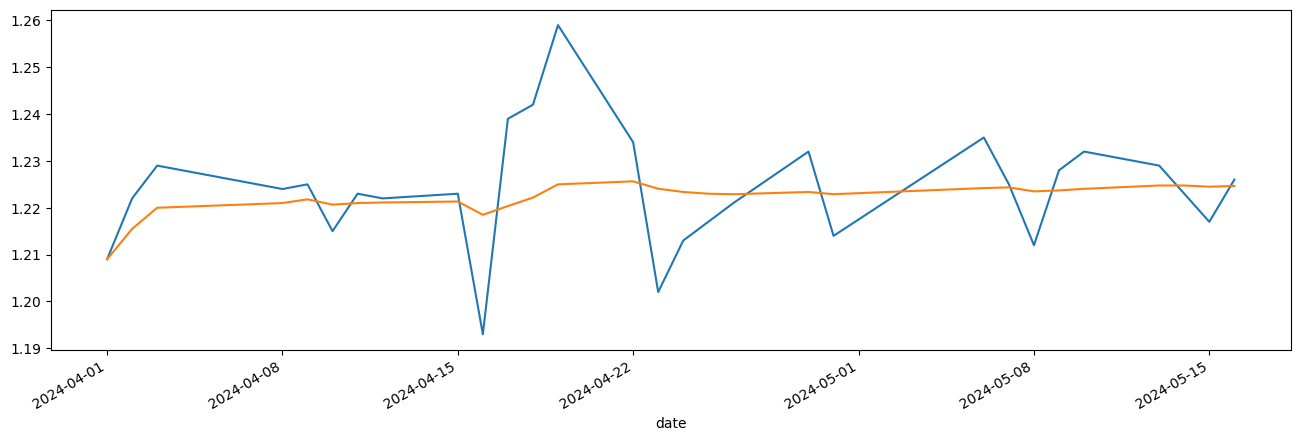

In [30]:
n1 = df_price_entry['515210.XSHG']
n2 = df_price_entry['515210.XSHG'].rolling(20, min_periods = 1).mean()
n1.plot(figsize = (16,5))
n2.plot(figsize = (16,5))


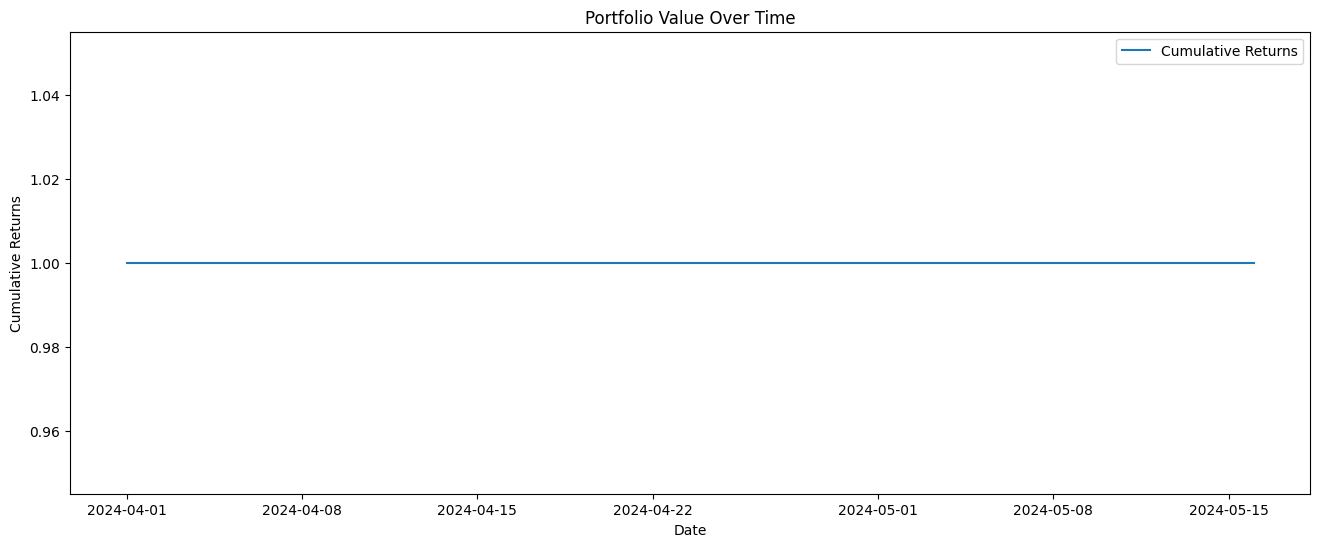

初始资金: 10000
最终资金: 10000
年化收益率: 0.00%
最大回撤: 0.00%
未考虑无风险利率的夏普比率: nan
交易次数: 0


In [27]:
from scipy import stats
df = df_price_entry.copy()
count = 0
initial_capital = 10000
positions = 4
slippage_and_fees = 0.00  # 滑点
portfolio_value_tracker = []

capital = initial_capital
cash = initial_capital




etf_value = 0
holdings = {etf: 0 for etf in df.columns} 
peak = {etf: 0 for etf in df.columns}

# 突破60日均线 + 斜率
def check_buy_signals(etf, price_data_daily, current_date, start_date):
    if len(price_data_daily) < 20 or current_date < start_date + pd.Timedelta(days=20):
        return False
    ma50 = price_data_daily[-20:].mean()
    yesterday_close = price_data_daily[-2]
    today_close = price_data_daily[-1]
    
    # slope,itc,r_v,p_v,std = stats.linregress(range(20),price_data_daily[-20:] )
    # slope_positive = np.polyfit(range(20), price_data_daily[-20:], 1)[0] > 0
    # slope_positive = price_data_daily[-1] > price_data_daily[-6]
    if yesterday_close < ma50 and today_close >= ma50 and slope_positive:
        return True
    
    # if yesterday_close < ma50 and today_close >= ma50:
    #     return True
    return False

def buy(etf, price, date):
    global capital, cash, etf_value, holdings, count
    if not np.isnan(price) and holdings[etf] == 0:
        num_held_etfs = sum(1 for h in holdings.values() if h > 0)
        if num_held_etfs < positions:
            investable_cash = cash / (positions - num_held_etfs)
            etf_amount = int(investable_cash * (1 - slippage_and_fees) / price) // 100 * 100
            holdings[etf] = etf_amount
            cash -= etf_amount * price  
            peak[etf] = price * 1.02 
            print(f"{date}: 买入 {etf}, 价格 {price}, 数量 {etf_amount}")
            count += 1

def check_stop_conditions(etf, price):
    if holdings[etf] <= 0:
        return False
    if price < peak[etf] / 1.02 * 0.99:
        return True
    if price >= peak[etf]:  
        peak[etf] = price * 1.02  
    if price < peak[etf] / 1.02 * 0.99:  
        return True
    return False


def sell(etf, price, date):
    global capital, cash, etf_value, holdings,count
    if not np.isnan(price) and holdings[etf] > 0:
        proceeds = holdings[etf] * price * (1 - slippage_and_fees)
        cash += proceeds 
        etf_value -= holdings[etf] * price
        print(f"{date}: 卖出 {etf}, 价格 {price}, 数量 {holdings[etf]}")
        holdings[etf] = 0
        count+=1


start_date = pd.to_datetime('2020-01-01')
# 主循环 循环df_price_entry和df_price_exit
trading_hours = ['10:30', '11:30', '14:00', '15:00']
for date, prices_daily in df.iterrows():
    date_str = date.strftime('%Y-%m-%d')
    for trading_hour in trading_hours:
        datetime_str = f"{date_str} {trading_hour}"
        datetime_index = pd.to_datetime(datetime_str)
        if datetime_index in df_price_exit.index:
            prices_hourly = df_price_exit.loc[datetime_index]

            # 循环 df_price_exit小时线数据找准时机出场
            for etf in prices_daily.index:
                if etf in prices_hourly and not np.isnan(prices_hourly[etf]):
                    price_hourly = prices_hourly[etf]
                    if check_stop_conditions(etf, price_hourly):
                        sell(etf, price_hourly, datetime_index)
    
    # 循环 df_price_entry 日线数据卖出
    for etf in prices_daily.index:
        price_data_daily = df[etf].loc[:date]
        if check_buy_signals(etf, price_data_daily, date, start_date):
            num_held_etfs = sum(1 for h in holdings.values() if h > 0)
            if num_held_etfs < positions:
                buy(etf, prices_daily[etf], date)
    etf_value = sum(holdings[etf] * prices_daily[etf] for etf in prices_daily.index if holdings[etf] > 0)
    capital = cash + etf_value
    portfolio_value_tracker.append(capital)

portfolio_values = np.array(portfolio_value_tracker)
returns = portfolio_values[1:] / portfolio_values[:-1] - 1
cumulative_returns = portfolio_values / initial_capital - 1

# 年化收益率
annualized_return = (portfolio_values[-1] / portfolio_values[0])**(250/len(portfolio_values))-1
rolling_max = np.maximum.accumulate(portfolio_values)
daily_drawdown = portfolio_values / rolling_max - 1
max_drawdown = np.min(daily_drawdown)

average_daily_return = np.mean(returns)
annualized_dev = np.std(returns) * np.sqrt(252)
sharp_ratio = annualized_return / annualized_dev

plt.figure(figsize=(16, 6))
plt.plot(df.index, portfolio_values/10000, label='Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Portfolio Value Over Time')
plt.legend()
plt.show()

print(f"初始资金: {initial_capital}")
print(f"最终资金: {portfolio_values[-1]}")
print(f"年化收益率: {annualized_return:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")
print(f"未考虑无风险利率的夏普比率: {sharp_ratio:.2f}")
print(f"交易次数: {count}")